In [58]:
import os
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import linalg
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import array as arr
import seaborn as sns
import random
import pylab
from scipy import stats
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import inverse_method_funs as inv


In [73]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

## Upload required values

In [74]:
fname_EV = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_28AM.csv'
#fname_EV = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_25AM_surface.csv'
#fname_EV = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_noise.csv'
freqs, sv = inv.read_widebandfrequencyresponse(fname_EV, extracols = 2)

In [75]:
fname_sim = '../ZooScatStuff/my_data.feather'
nsim=1000
specs, freqs_sim, sig_bs_sim, sig_bs_mean = inv.read_scatteringmodelsimulations(fname_sim, nsim=nsim)


Resample the simulation values to match the frequencies of the measured frequencies

In [76]:
sigma_bs = np.zeros([len(freqs),np.shape(sig_bs_sim)[1],len(specs)])

for ind_spec in range(0,len(specs)):
    for ind_sim in range(0,np.shape(sig_bs_sim)[1]):
        f = UnivariateSpline(freqs_sim,sig_bs_sim[:,ind_sim,ind_spec], k=5)
        sigma_bs[:,ind_sim,ind_spec] = f(freqs)

## Plot imported values (sv and crossectional backscatter)
A randomly selected model result for each species

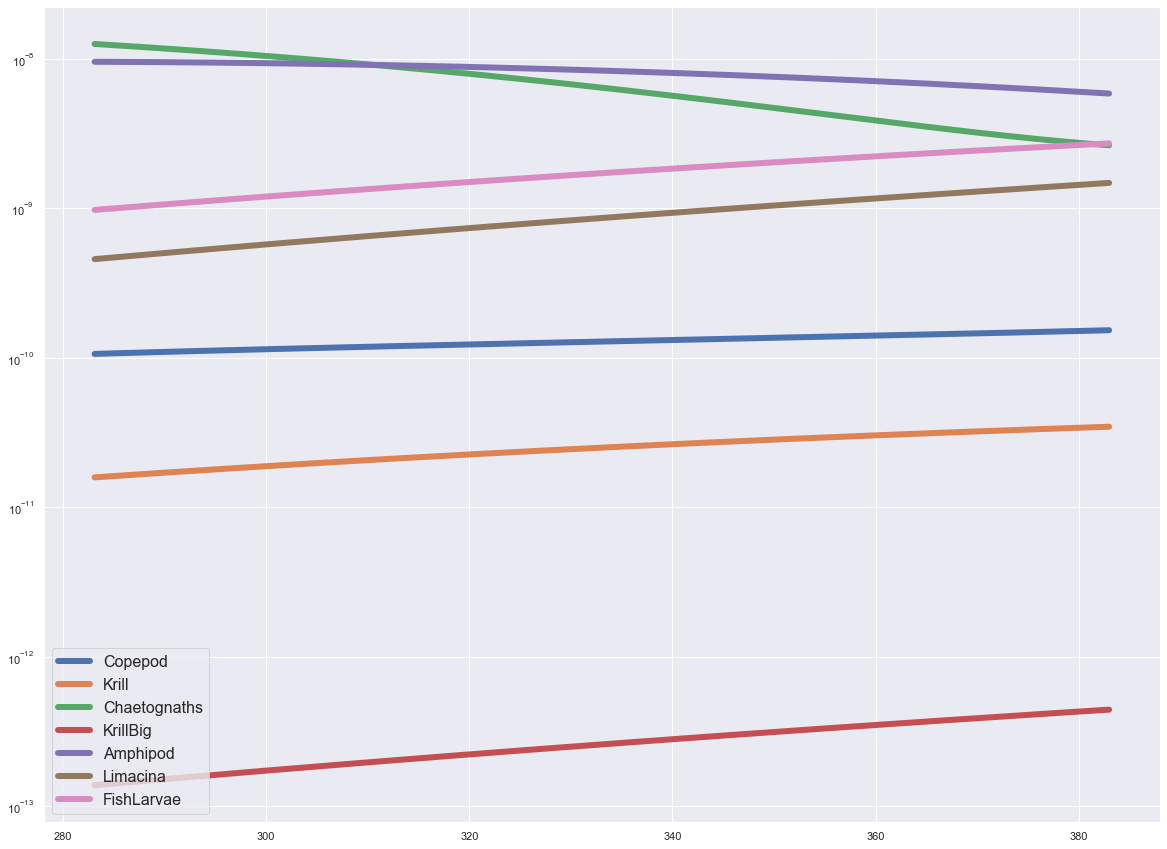

In [97]:
k = np.random.randint(nsim)

sigbs = sigma_bs[:,k,:]
fig=plt.figure(figsize=(20, 15),facecolor='w', edgecolor='k')
plt.semilogy(freqs,sigbs, linewidth=6)
plt.legend(specs, fontsize=16)

# Run Least-Squares calculator
scipy - optimize - lsq_linear
Run the least-squares algorithm 1000 times on randomly selected model outputs for each species.

Using the method I found works best in Inverse_least_squares.ipynb

In [92]:
n_iter = 50
density = np.zeros([np.shape(sigbs)[1], n_iter, np.shape(sv)[1]])
sig_boot = np.zeros([len(freqs),np.shape(sigbs)[1]])

for k in range(0, n_iter):
    for spec in range(0,len(specs)):
        sig_boot[:,spec] = sigma_bs[:,np.random.randint(nsim),spec]
    for ind in range(0, np.shape(sv)[1]):
        d = optimize.lsq_linear(sig_boot, arr.array('d',sv[:,ind]), bounds=(0,np.inf))
        density[:,k,ind] = d.x

Text(0.5, 0, 'Functional group')

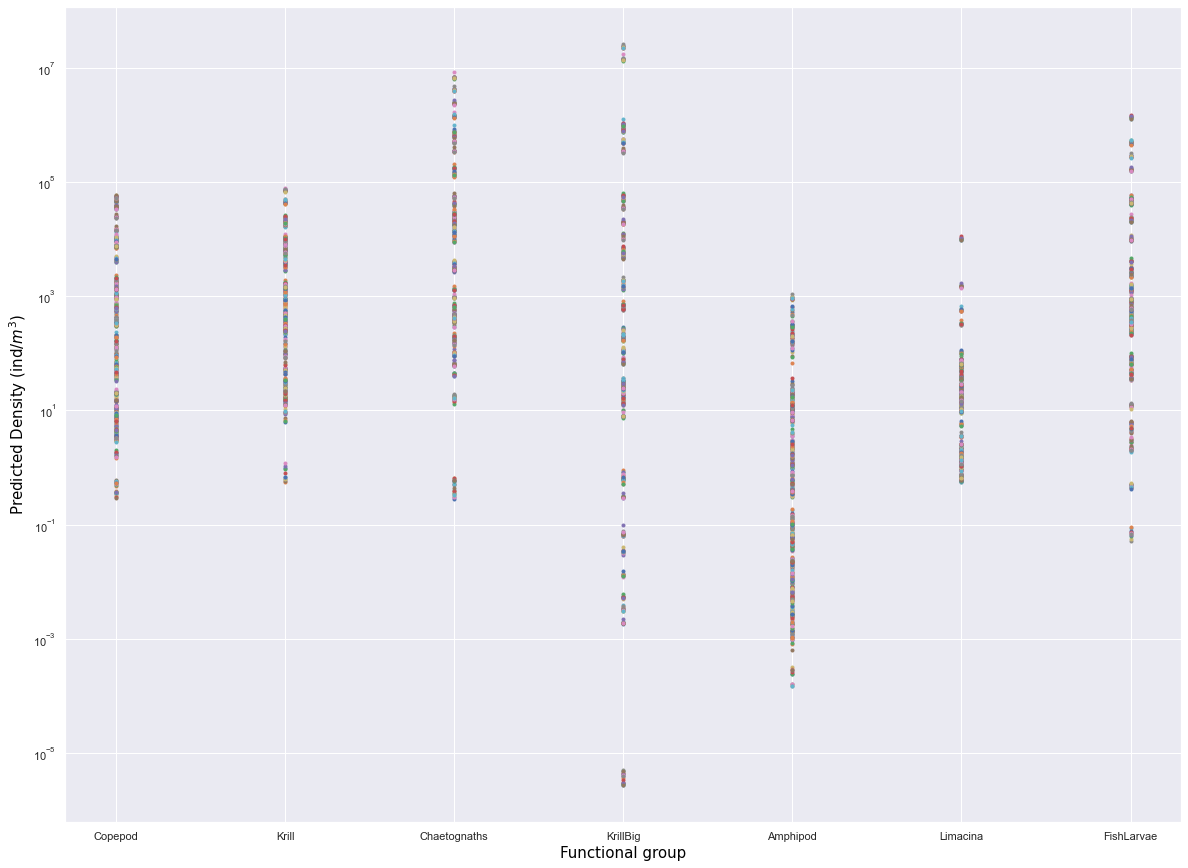

In [93]:
fig=plt.figure(figsize=(20, 15),facecolor='w', edgecolor='k')
for ind in range(0, n_iter):
    plt.semilogy(specs,(density[:,ind,:]), '.')
#plt.ylim([0,1e6])
plt.ylabel('Predicted Density (ind/$m^3$)', axis_font)
plt.xlabel('Functional group', axis_font)

### Compare the predicted sv with the measured sv

Text(0.5, 0, 'Frequency (kHz)')

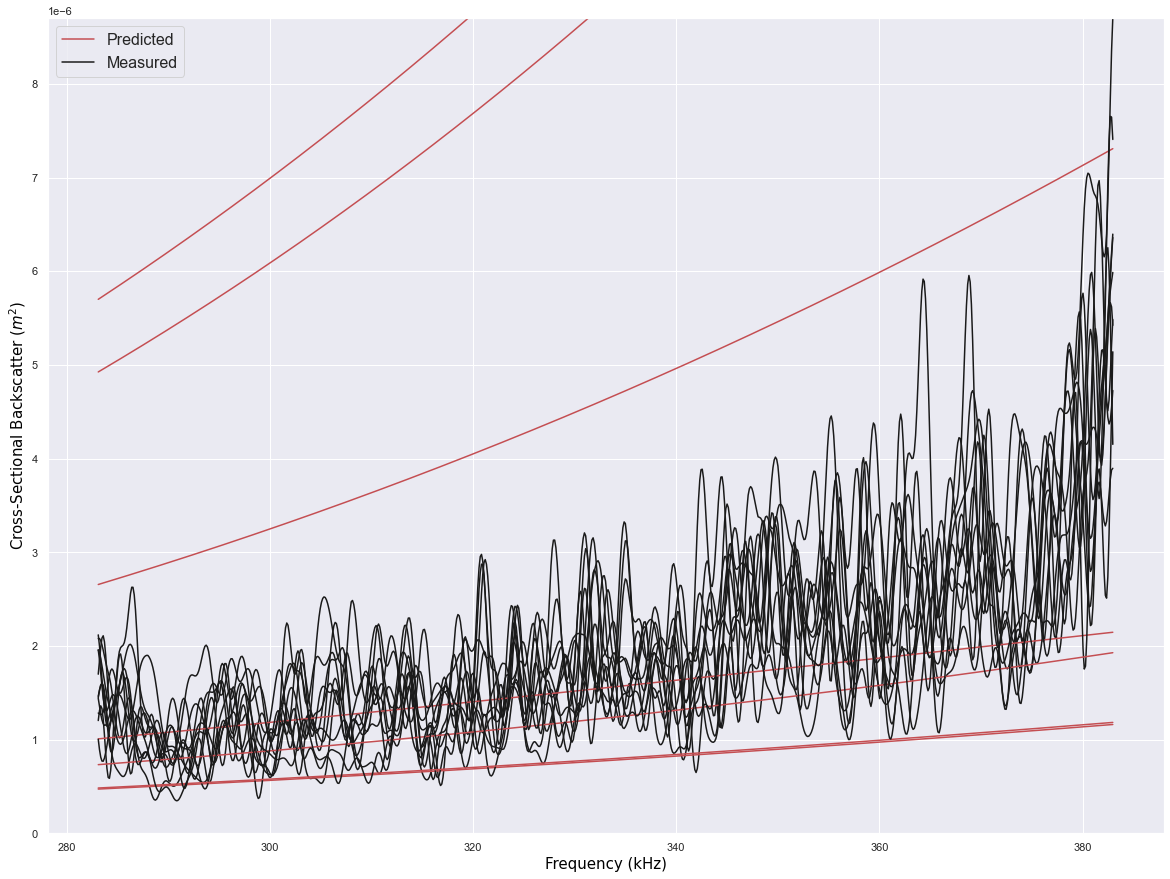

In [91]:
fig=plt.figure(figsize=(20, 15))
for ind in range(0, np.shape(sv)[1]):
    plt.plot(freqs,np.sum(sigbs*density[:,np.random.randint(n_iter),ind],1),'r', freqs ,arr.array('d',sv[:,ind]),'k')

plt.ylim([0,np.max(sv)])
plt.legend(['Predicted', 'Measured'], fontsize=16)
plt.ylabel('Cross-Sectional Backscatter ($m^{2}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font)

In [34]:
np.shape(sigbs)[1]

7

In [17]:
np.shape(sv)[1]

11

In [56]:
sigbs*density[:,np.random.randint(n_iter),:]


ValueError: operands could not be broadcast together with shapes (819,7) (7,11) 

In [57]:
d

 active_mask: array([0, 0, 0, 0, 0, 0, 0])
        cost: 5.393175139210379e-11
         fun: array([2.13472256e-07, 2.12910979e-07, 2.12202337e-07, 2.11420573e-07,
       2.10647483e-07, 2.09966969e-07, 2.09458220e-07, 2.09190559e-07,
       2.09066242e-07, 2.09215555e-07, 2.09679477e-07, 2.10433802e-07,
       2.11424329e-07, 2.12571092e-07, 2.13775634e-07, 2.14930490e-07,
       2.15929850e-07, 2.16680205e-07, 2.17109819e-07, 2.17176139e-07,
       2.16870417e-07, 2.16221485e-07, 2.15284765e-07, 2.14151310e-07,
       2.12931144e-07, 2.11746160e-07, 2.10719472e-07, 2.09964435e-07,
       2.09574265e-07, 2.09613171e-07, 2.10109864e-07, 2.11054158e-07,
       2.12397052e-07, 2.14054510e-07, 2.15914602e-07, 2.17849860e-07,
       2.19719770e-07, 2.21397351e-07, 2.22771775e-07, 2.23760853e-07,
       2.24318299e-07, 2.24476432e-07, 2.24235280e-07, 2.23668799e-07,
       2.22877227e-07, 2.21977111e-07, 2.21090355e-07, 2.20333372e-07,
       2.19807258e-07, 2.19631434e-07, 2.19821192e-07, 